In [1]:
import csv
import functions as func
csv_1 = '2.csv'
# csv_1='/content/drive/MyDrive/PythonLearn/lottery/2.csv'
red_avg_total = (1+35)*5/2
blue_avg_total = (1+12)*2/2

reds, blues, red_blues = func.get_data(csv_1)
print(len(reds))


800


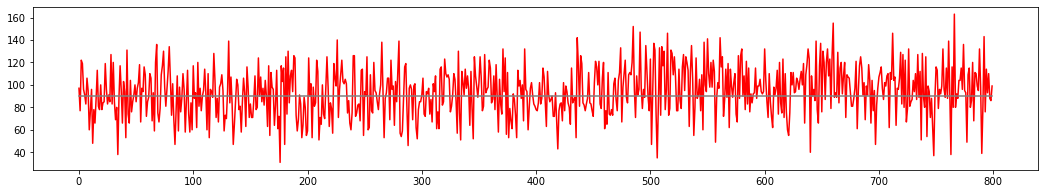

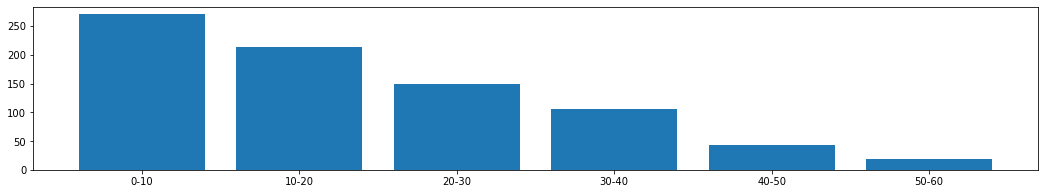

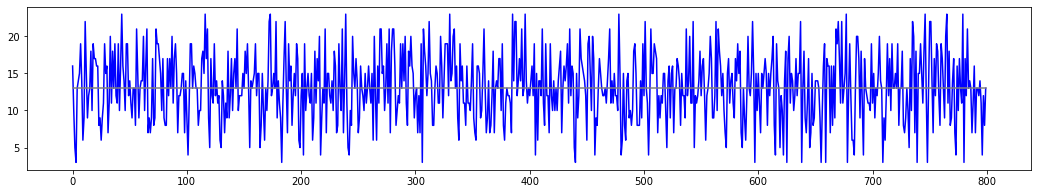

In [2]:
# 1 sum & diff
import matplotlib.pyplot as plt
# red
red_sums, red_avgs, red_diffs = func.get_sum_avg_diff(
    reds, red_avg_total)
func.draw_plot(red_sums, red_avgs)
diff_count = func.get_diff_count(red_diffs)
func.draw_bar(diff_count.keys(), diff_count.values())
# blue
blue_sums, blue_avgs, _ = func.get_sum_avg_diff(
    blues, blue_avg_total)
func.draw_plot(blue_sums, blue_avgs, color='blue')
# prefer diff=10, 20

In [ ]:
# 2: 3 area
import matplotlib.pyplot as plt
area1 = list(range(1, 13))
area2 = list(range(13, 25))
area3 = list(range(25, 36))
dic_case = {}
for red in reds:
    area1_count, area2_count, area3_count = 0, 0, 0
    for boll in red:
        if (boll in area1):
            area1_count += 1
        elif boll in area2:
            area2_count += 1
        elif boll in area3:
            area3_count += 1
    key = f'{area1_count}-{area2_count}-{area3_count}'
    value = dic_case.get(key, 0)
    dic_case[key] = value+1

fig, ax = plt.subplots(figsize=(18, 3))
ax.bar(dic_case.keys(), dic_case.values(), color='blue')
plt.show()
# prefer: 2-1-2, 2-2-1, 1-2-2, 1-3-1, 3-1-1, 1-1-3


In [ ]:
# 3: + area, 4 area
import matplotlib.pyplot as plt
area1 = [1, 2, 3, 7, 8, 9, 13, 14, 15]
area2 = [4, 5, 6, 10, 11, 12, 16, 17, 18]
area3 = [19, 20, 21, 25, 26, 27, 31, 32, 33]
area4 = [22, 23, 24, 28, 29, 30, 34, 35]

dic_case = {}
for red in reds:
    area1_count, area2_count, area3_count, area4_count = 0, 0, 0, 0
    for boll in red:
        if (boll in area1):
            area1_count += 1
        elif boll in area2:
            area2_count += 1
        elif boll in area3:
            area3_count += 1
        elif boll in area4:
            area4_count += 1
    key = f'{area1_count}-{area2_count}-{area3_count}-{area4_count}'
    value = dic_case.get(key, 0)
    dic_case[key] = value+1

fig, ax = plt.subplots(figsize=(18, 3))
ax.bar(dic_case.keys(), dic_case.values(), color='blue')
plt.xticks(rotation=90)
plt.show()
print(dic_case)
# prefer: 2-1-1-1, 1-1-2-1, 1-2-1-1, 1-1-1-2, 1-2-2-0


In [ ]:
# 5, ac
import matplotlib.pyplot as plt


def get_ac_count(inputs, nums):
    ac_count = {}
    for bolls in inputs:
        diffs = set()
        for boll1 in bolls:
            for boll2 in bolls:
                diffs.add(abs(boll1-boll2))
        ac = len(diffs)-1-(nums-1)
        count = ac_count.get(ac, 0)
        ac_count[ac] = count+1
    return ac_count


red_ac_count = get_ac_count(reds, 5)
all_ac_count = get_ac_count(red_blues, 7)

fig, ax = plt.subplots(figsize=(18, 3))
ax.bar(red_ac_count.keys(), red_ac_count.values())
plt.show()
fig, ax = plt.subplots(figsize=(18, 3))
ax.bar(all_ac_count.keys(), all_ac_count.values())
plt.show()
# red: prefer 6, 5/4
# all: 9/10/11, 7/8/12


In [ ]:
# 6, prime number
import matplotlib.pyplot as plt
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]
prime_count = []
for red in reds:
    intersec = list(set(primes) & set(red))
    prime_count.append(len(intersec))

fig, ax = plt.subplots(figsize=(18, 3))
ax.plot(prime_count)
plt.show()

prime_stat = {}
for num in range(0, 6):
    count = prime_count.count(num)
    prime_stat[num] = count
fig, ax = plt.subplots(figsize=(18, 3))
ax.bar(prime_stat.keys(), prime_stat.values())
plt.show()
# prefer: 1/2, 3/0


In [ ]:
# 7 flow

tenRed = reds[:11]
tenBlue = blues[:10]
print(tenBlue)
fig, ax = plt.subplots(figsize=(18, 3))
ax.plot(tenRed)
plt.show()


In [ ]:
# 8 hot
dic1 = {}
for index in range(1, 36):
    dic1[index] = 0
for row in reds[:10]:
    for ball in row:
        dic1[ball] += 1
fig, ax = plt.subplots(figsize=(18, 3))
ax.bar(dic1.keys(), dic1.values())
plt.show()


In [ ]:
prefers = [9, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 24]
result = []
count = len(prefers)
for i in range(0, count):
    for j in range(i+1, count):
        for k in range(j+1, count):
            for l in range(k+1, count):
                for m in range(l+1, count):
                    result.append(
                        (prefers[i], prefers[j], prefers[k], prefers[l], prefers[m]))
result = reds
print(f'total: {len(result)}')

# result=[[4,12,17,29,35],[4,11,12,17,31],[3,16,19,29,34],[7,8,21,29,35]]


def sum_filter(source, avg=90, diff=10):
    result = list(filter(lambda x: abs(sum(x)-avg) <= diff, source))
    return result


def area3_filter(source):
    area1 = list(range(1, 13))
    area2 = list(range(13, 25))
    area3 = list(range(25, 36))
    pattern = ['2-1-2', '2-2-1', '1-2-2', '1-3-1', '3-1-1', '1-1-3']
    filtered = []
    for row in source:
        area1_count, area2_count, area3_count = 0, 0, 0
        for boll in row:
            if (boll in area1):
                area1_count += 1
            elif boll in area2:
                area2_count += 1
            elif boll in area3:
                area3_count += 1
        key = f'{area1_count}-{area2_count}-{area3_count}'
        if key in pattern:
            filtered.append(row)
    return filtered


def area4_filter(source):
    area1 = [1, 2, 3, 7, 8, 9, 13, 14, 15]
    area2 = [4, 5, 6, 10, 11, 12, 16, 17, 18]
    area3 = [19, 20, 21, 25, 26, 27, 31, 32, 33]
    area4 = [22, 23, 24, 28, 29, 30, 34, 35]
    pattern = ['2-1-1-1', '1-1-2-1', '1-2-1-1', '1-1-1-2', '1-2-2-0']
    filtered = []
    for row in source:
        area1_count, area2_count, area3_count, area4_count = 0, 0, 0, 0
        for boll in row:
            if (boll in area1):
                area1_count += 1
            elif boll in area2:
                area2_count += 1
            elif boll in area3:
                area3_count += 1
            elif boll in area4:
                area4_count += 1
        key = f'{area1_count}-{area2_count}-{area3_count}-{area4_count}'
        if key in pattern:
            filtered.append(row)
    return filtered


def ac_filter(source):
    filtered = []
    nums = 5
    for bolls in source:
        diffs = set()
        for boll1 in bolls:
            for boll2 in bolls:
                diffs.add(abs(boll1-boll2))
        ac = len(diffs)-1-(nums-1)
        if ac >= 6:
            filtered.append(bolls)
    return filtered


filtered = sum_filter(result)
print(len(filtered))
print(f'sum filter: {len(filtered)}')
filtered = area3_filter(filtered)
print(f'area3 filter: {len(filtered)}')
# filtered=area4_filter(filtered)
print(f'area4 filter: {len(filtered)}')
filtered = ac_filter(filtered)
print(filtered[:10])
print(f'ac filter: {len(filtered)}')
